### Data Preprocessing and Exploration

**Instruction:**

1. Load the 'Iris' dataset in Python using pandas or scikit-learn

In [17]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [18]:
# Loading the iris dataset
iris = load_iris()

# Convert to pandas DataFrame 
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
 
# Displaying the first 5 observations   
print(f"Below are the first 5 obrservations in the dataset: \n")
print(df_iris.head())




Below are the first 5 obrservations in the dataset: 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [19]:
# Displaying basic information about the dataset   
print(f"\nBelow are a few basic information about the dataset: \n")
print(df_iris.info())



Below are a few basic information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


**Insights:**

    - The Iris dataset has 5 columns (variable name: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species') and 149 records/rows.
    
    - As seen from above, there are 0 missing values for each column. Each column has the correct data type (in the right format). 

--------------------------------------------------------------

**Instruction:**

2. Preprocess:

    - Handle any missing values (demonstrate checks).

    - Normalize features using Min-Max scaling.
    
    - Encode the class label if needed (e.g., one-hot for some models).

In [20]:
# Checking for missing values in each column
print(f"\n The total number of missing values in each column are: \n")
print(df_iris.isnull().sum())

# Checking for duplicates in the data set
print(f"\n The total number of duplicate records are: \n")
print(df_iris.duplicated().sum())

# Dropping the duplicate record
df_iris.drop_duplicates(inplace=True)

# Confirmng there are no duplicates in the data set
print(f"\n The total number of duplicate records after dropping are: \n")
print(df_iris.duplicated().sum())



 The total number of missing values in each column are: 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

 The total number of duplicate records are: 

1

 The total number of duplicate records after dropping are: 

0


- As seen from above, there are no missing values in each column thus no need to drop, or fill with mean/mode, or impute.

- The check for duplicates showed one duplicate record, this was removed.

In [21]:
# Normalizing features using Min-Max scaling
# Normalizing to a common range, 0 to 1, to ensure no feature unfairly dominates due to scale

features = df_iris.columns[:-1]  # all except species
scaler = MinMaxScaler()
df_iris[features] = scaler.fit_transform(df_iris[features])

print("Numerical features have been scaled.")

Numerical features have been scaled.


In [22]:
# Encoding/converting class label (species: 'setosa', 'versicolor', 'virginica') as numbers
le = LabelEncoder()
df_iris['species_encoded'] = le.fit_transform(df_iris['species'])

print("'Species' column has been encoded.")


'Species' column has been encoded.


----------------------------------------------------------------------

**Instruction:**

3. Explore:

    - Compute summary statistics (mean, std, etc.) using pandas.describe().

    - Visualize: Pairplot (using seaborn) and correlation heatmap.
    
    - Identify any potential outliers using boxplots.

In [23]:
# Summary statistics to help see the general shapa of the data
print("\nSummary statistics for the Iris Dataset:")
print(df_iris.describe())


Summary statistics for the Iris Dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            0.428784          0.441555           0.465931   
std             0.230792          0.181809           0.299626   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.559322   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  species_encoded  
count        149.000000       149.000000  
mean           0.456096         0.993289  
std            0.317759         0.817847  
min            0.000000         0.000000  
25%            0.083333         0.000000  
50%            0.500000         1.000000  
75%            0.708333         2.000000  
max            1.000000     

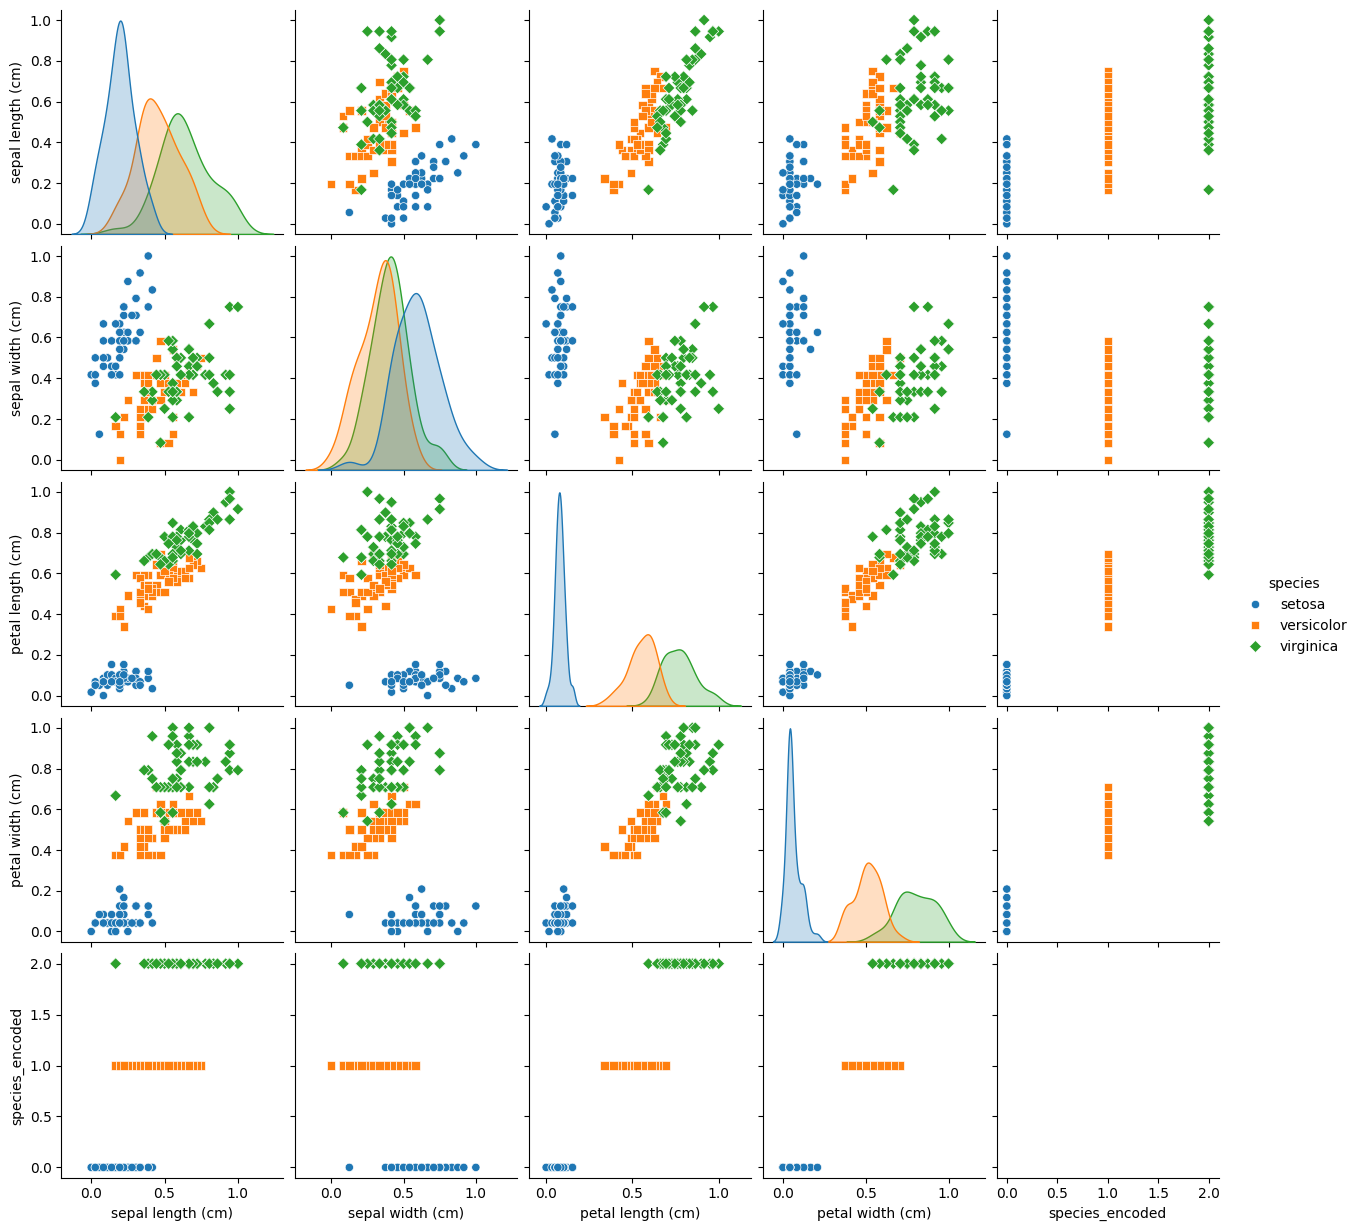

In [ ]:
"""
- Pairplot: A grid of scatterplots comparing each feature against each other, colored by species.
- Shows how features relate and helps spot patterns or clusters.

"""

# Pairplot colored by species
sns.pairplot(df_iris, hue='species', markers=["o", "s", "D"])
plt.savefig("pairplot.png")
plt.show()



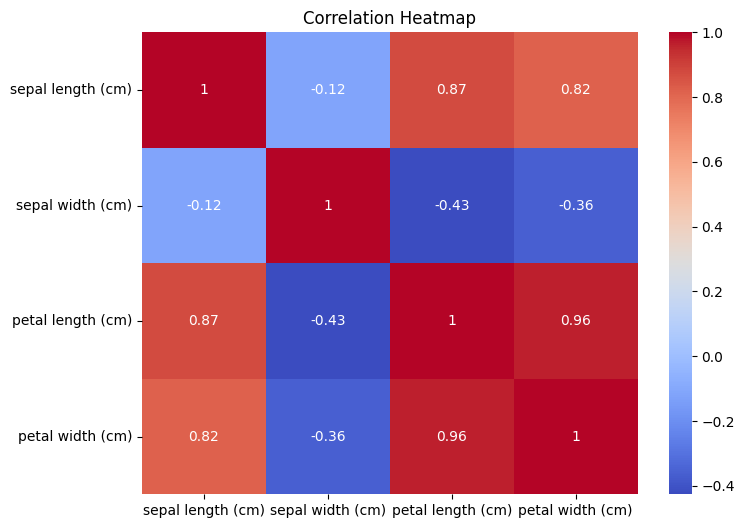

In [ ]:
"""_
- Correlation Heatmap: Shows how strongly features relate to each other (positively or negatively).

"""

# Correlation heatmap

# Calculate correlation matrix
corr_matrix = df_iris[iris.feature_names].corr()

# heatmap visual
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()


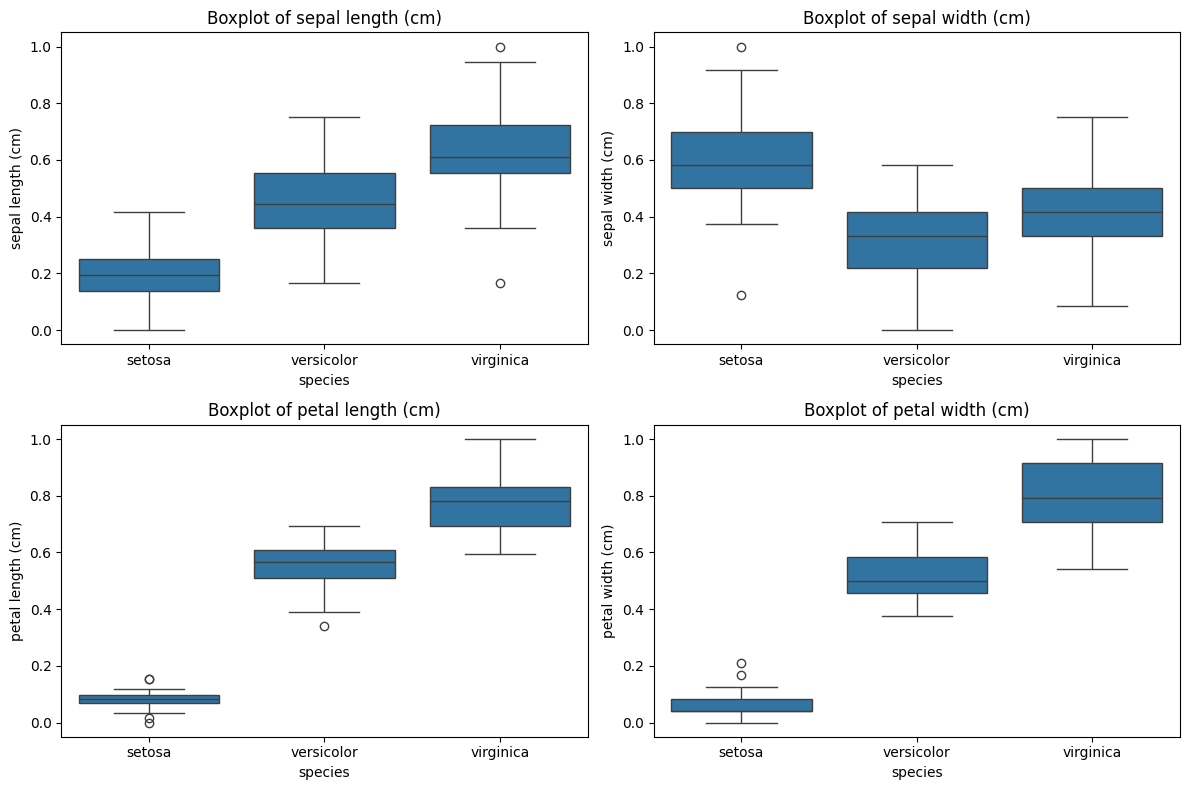

In [36]:
"""
- Boxplots: Visualize distribution of each feature and help identify outliers
"""

# Boxplots to find outliers by each species
plt.figure(figsize=(12,8))
for i, feature in enumerate(df_iris.columns[:-2]):  # skip species and encoded variables
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df_iris)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.savefig("boxplots.png")
plt.show()

---------------------------------------------------------------------------

**Instruction:**

4. Write a function to split data into train/test (80/20).

In [40]:
# Training data teaches the model; testing data checks how well the model learned.

def split_data(df_iris):
    
    # 'x' is sepal length, sepal width, petal length, petal width (all normalized between 0 and 1)
    X = df_iris.iloc[:, :-2]  # features (exclude species and encoded)
    
    # 'y' is the target variable 'species_encoded'
    # 'y' is what ML model will try to predict based on 'x'
    y = df_iris['species_encoded']
    
    # X_train: features for training
    # X_test: features for testing
    # y_train: target labels for training
    # y_test: target labels for testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y) # with stratification to keep the dataset balanced
    
    # to confirm success of split
    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    return X_train, X_test, y_train, y_test

split_data(df_iris)


Train size: 119, Test size: 30


(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 6             0.083333          0.583333           0.067797          0.083333
 128           0.583333          0.333333           0.779661          0.833333
 95            0.388889          0.416667           0.542373          0.458333
 44            0.222222          0.750000           0.152542          0.125000
 30            0.138889          0.458333           0.101695          0.041667
 ..                 ...               ...                ...               ...
 52            0.722222          0.458333           0.661017          0.583333
 47            0.083333          0.500000           0.067797          0.041667
 102           0.777778          0.416667           0.830508          0.833333
 124           0.666667          0.541667           0.796610          0.833333
 16            0.305556          0.791667           0.050847          0.125000
 
 [119 rows x 4 columns],
      sepal length (cm)  